<a href="https://colab.research.google.com/github/tubameric/Trivallay-Bike-Store-Client-Project/blob/main/Trivalley_Bike_Store_Classification_model_to_predict_the_Bike_Buyers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing pycaret
!pip install -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 MB/s 

In [ ]:
# Importing the packages and the data set
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/tubameric/PortfolioProjects/main/Trivalley%20Customer%20Spend%20and%20Buyer%20Flag%20Data.csv')

# Displaying the data shape
data.shape


(16519, 25)

In [ ]:
#Importing datetime package
import pandas as pd
from datetime import datetime

# Add Age as a new column
data['BirthDate'] = pd.to_datetime(data['BirthDate'])

def calculate_age(born):
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Calculate Age based on the Birth Date
data['Age'] = data['BirthDate'].apply(calculate_age)

In [ ]:
# Displaying the data columns
data.columns

Index(['CustomerID', 'AveMonthSpend', 'BikeBuyer', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2',
       'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age'],
      dtype='object')

<Axes: >

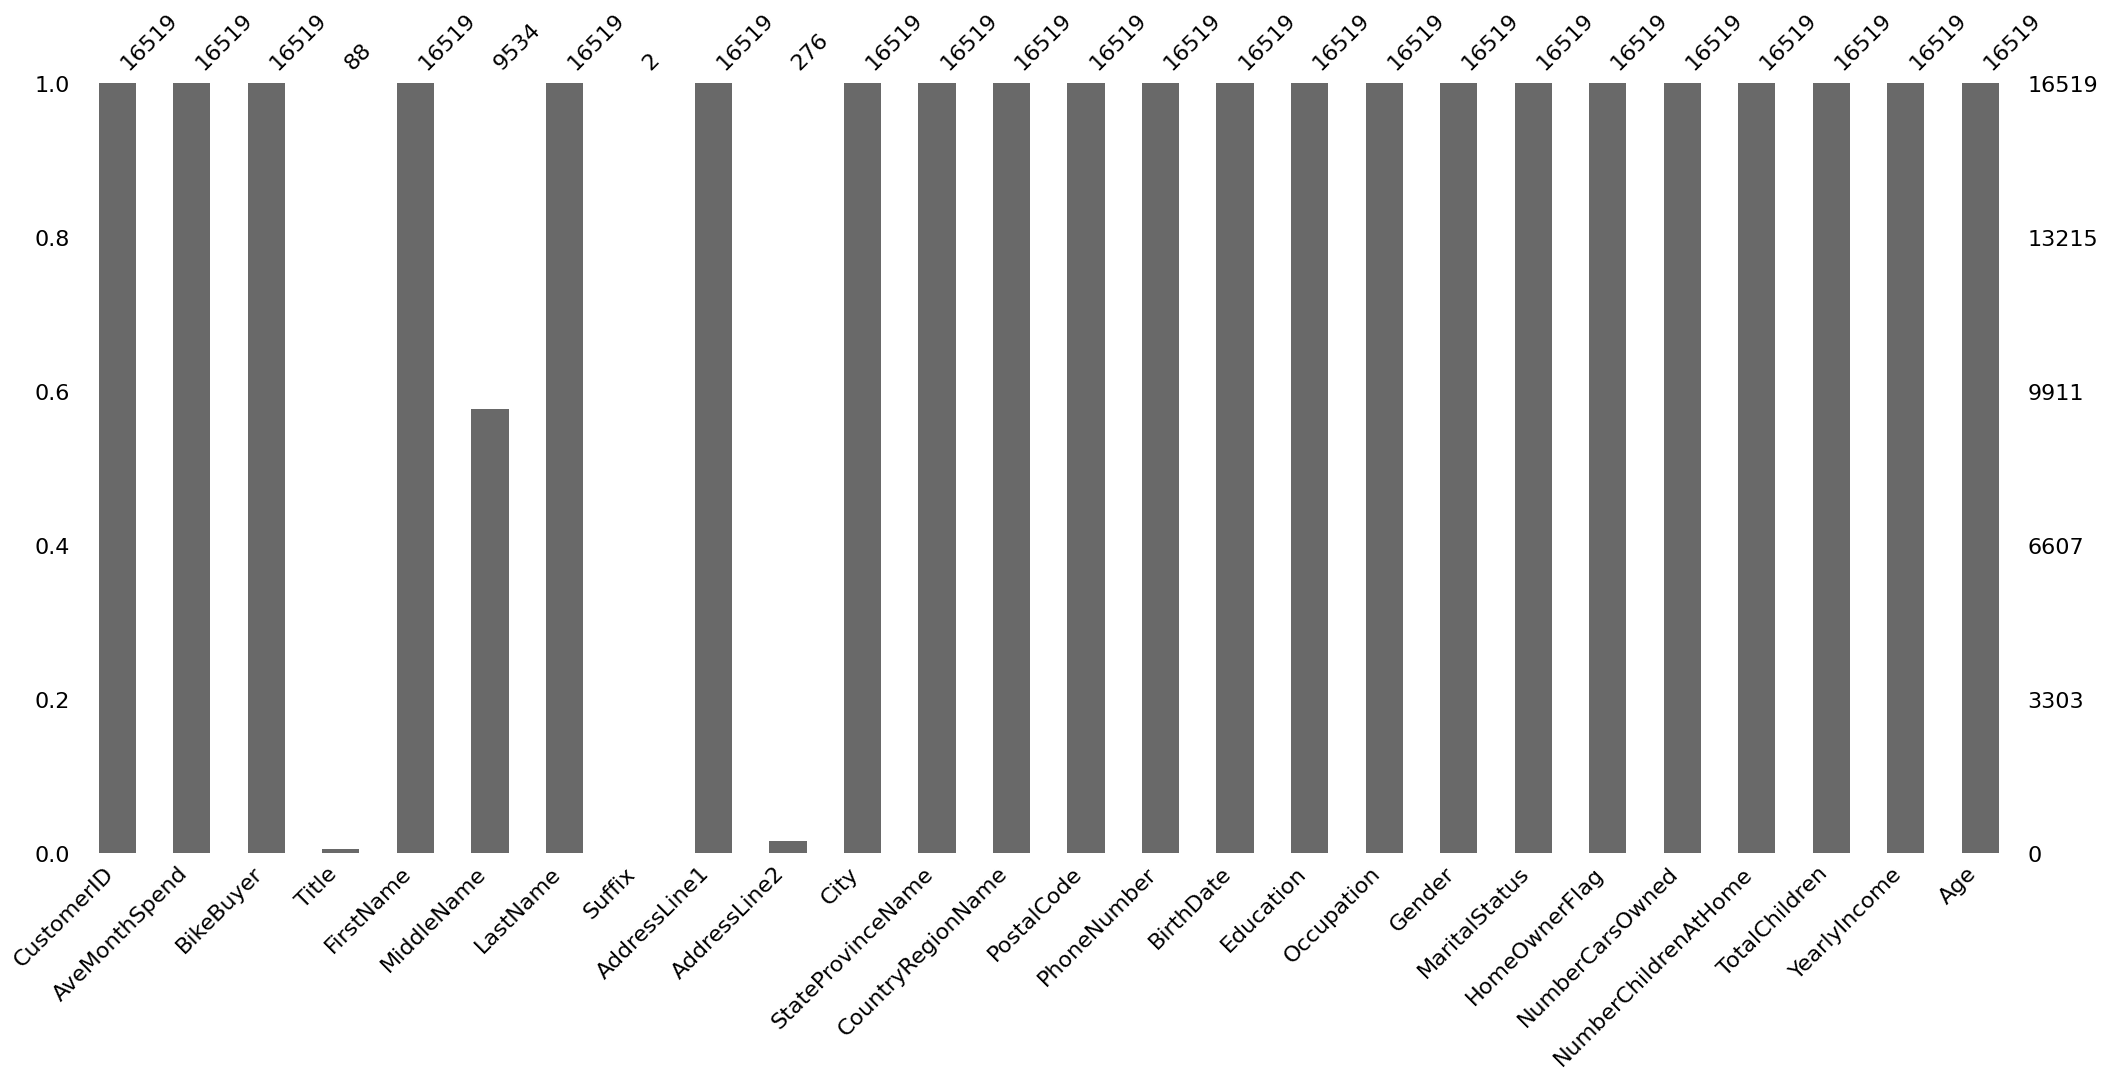

In [ ]:
# Importing missigno package to see the missing data proportion
import missingno as msno
msno.bar(data)

In [ ]:
# Setting the target variable
y = 'BikeBuyer'

In [ ]:
# Setting the noise/redundant variables & variables with more than 20% missing data
ignored_cols = ['CustomerID','Title', 'FirstName','MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2',
              'PhoneNumber', 'BirthDate','TotalChildren']

In [ ]:
# Setting the categorical variables
cat_cols = ['City', 'StateProvinceName', 'CountryRegionName', 'PostalCode',
       'Education', 'Occupation', 'Gender','MaritalStatus', 'HomeOwnerFlag']

In [ ]:
# Setting the numerical variables
num_cols = ['NumberChildrenAtHome','YearlyIncome','Age']

In [ ]:
# Importing pycaret classification libraries
from pycaret.classification import *

In [ ]:
# Configuring the ML experiment using setup function
classif_model  = setup(data,
                      target = y,
                      ignore_features  = ignored_cols,
                      categorical_features = cat_cols,
                      numeric_features= num_cols)

,Description,Value
0,Session id,6930
1,Target,BikeBuyer
2,Target type,Binary
3,Original data shape,"(16519, 26)"
4,Transformed data shape,"(16519, 28)"
5,Transformed train set shape,"(11563, 28)"
6,Transformed test set shape,"(4956, 28)"
7,Ignore features,11
8,Numeric features,3
9,Categorical features,9


In [ ]:
# Invoking the ML algorithms
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:02:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ada Boost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7860,0.0000,0.5651,0.7303,0.6365,0.4884,0.4969,1.3780
ridge,Ridge Classifier,0.7832,0.0000,0.5205,0.7508,0.6141,0.4704,0.4860,0.2770
rf,Random Forest Classifier,0.7807,0.0000,0.5799,0.7079,0.6369,0.4821,0.4875,1.7000
qda,Quadratic Discriminant Analysis,0.7649,0.0000,0.5952,0.6629,0.6267,0.4559,0.4577,0.3720
nb,Naive Bayes,0.7627,0.0000,0.4622,0.7242,0.5636,0.4116,0.4315,0.3220
dt,Decision Tree Classifier,0.7217,0.0000,0.5927,0.5795,0.5858,0.3764,0.3765,0.3750
knn,K Neighbors Classifier,0.6670,0.0000,0.3563,0.4985,0.4151,0.1915,0.1969,0.4320
svm,SVM - Linear Kernel,0.5388,0.0000,0.3951,0.1342,0.2003,0.0038,0.0091,0.5680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7975,0.0000,0.5958,0.7448,0.6613,0.5194,0.5266,2.0410
lightgbm,Light Gradient Boosting Machine,0.7904,0.0000,0.5950,0.7257,0.6532,0.5052,0.5108,0.9500
ada,Ada Boost Classifier,0.7884,0.0000,0.6075,0.7140,0.6556,0.5045,0.5085,0.7240
lr,Logistic Regression,0.7860,0.0000,0.5651,0.7303,0.6365,0.4884,0.4969,1.3780
ridge,Ridge Classifier,0.7832,0.0000,0.5205,0.7508,0.6141,0.4704,0.4860,0.2770
lda,Linear Discriminant Analysis,0.7823,0.0000,0.5312,0.7407,0.6179,0.4717,0.4848,0.2990
xgboost,Extreme Gradient Boosting,0.7816,0.0000,0.6005,0.6999,0.6460,0.4895,0.4928,0.7210
rf,Random Forest Classifier,0.7807,0.0000,0.5799,0.7079,0.6369,0.4821,0.4875,1.7000
et,Extra Trees Classifier,0.7706,0.0000,0.5861,0.6803,0.6290,0.4645,0.4677,1.8220
qda,Quadratic Discriminant Analysis,0.7649,0.0000,0.5952,0.6629,0.6267,0.4559,0.4577,0.3720


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=6930, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Building the model using the best Algo
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8099,0.0000,0.6026,0.7759,0.6784,0.5464,0.5552
1,0.7917,0.0000,0.6649,0.6957,0.6799,0.5257,0.5260
2,0.8159,0.0000,0.6146,0.7841,0.6891,0.5610,0.5694
3,0.7976,0.0000,0.5651,0.7641,0.6497,0.5118,0.5233
4,0.7898,0.0000,0.5729,0.7358,0.6442,0.4983,0.5062
5,0.7976,0.0000,0.6068,0.7373,0.6657,0.5225,0.5276
6,0.7924,0.0000,0.5859,0.7353,0.6522,0.5069,0.5135
7,0.8036,0.0000,0.5964,0.7608,0.6686,0.5320,0.5400
8,0.7976,0.0000,0.6068,0.7373,0.6657,0.5225,0.5276


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Using the algo to predict bike buyers
predicted_bikebuyers = predict_model(model, data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8100,0.8741,0.6198,0.7638,0.6843,0.5505,0.5566


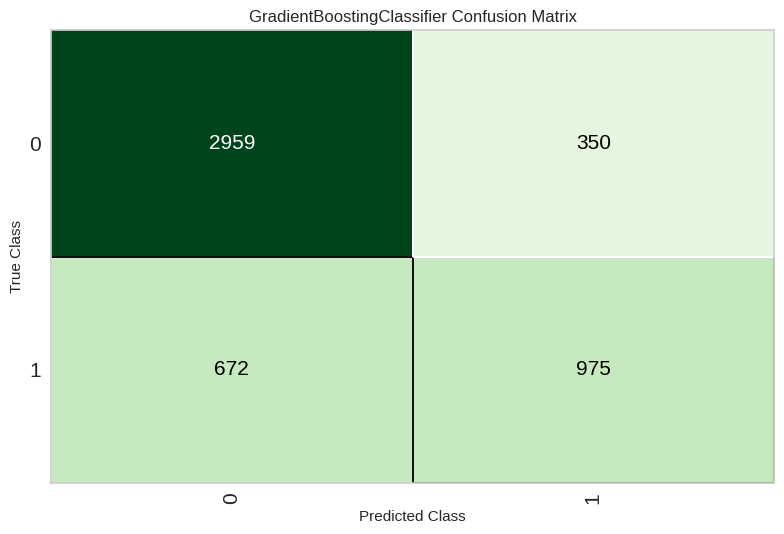

In [ ]:
plot_model(model, plot = 'confusion_matrix')

In [ ]:
# Downloading the predicted bike buyers
predicted_bikebuyers.to_csv("Bike Store Predicted Bike Buyers.csv")

In [ ]:
# Client data
client_data = pd.read_csv('https://raw.githubusercontent.com/nvamsimohan/DallasDSA/main/Trivalley%20Customer%20Spend%20and%20Buyer%20Flag%20Data.csv')

In [ ]:
client_data['BirthDate'] = pd.to_datetime(client_data['BirthDate'])

def calculate_age(born):
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

client_data['Age'] = client_data['BirthDate'].apply(calculate_age)

In [ ]:
# Predicting bike buyers for a client file

client_predictions = predict_model(model, client_data)
client_predictions.to_csv("Client Predicted Bike Buyers.csv")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8100,0.8741,0.6198,0.7638,0.6843,0.5505,0.5566
